In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats
from scipy.stats import norm, skew


from sklearn.model_selection import train_test_split, KFold, GroupKFold, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler

from sklearn.metrics import *

import sys, os
import random 

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
from IPython import display, utils


In [26]:
solar_wind = pd.read_csv("solar_wind.csv")
solar_wind.drop("source",inplace=True, axis=1)
solar_wind.timedelta = pd.to_timedelta(solar_wind.timedelta)
solar_wind.set_index(["period", "timedelta"], inplace=True)

dst = pd.read_csv("labels.csv")
dst.timedelta = pd.to_timedelta(dst.timedelta)
dst.set_index(["period", "timedelta"], inplace=True)

sunspots = pd.read_csv("sunspots.csv")
sunspots.timedelta = pd.to_timedelta(sunspots.timedelta)
sunspots.set_index(["period", "timedelta"], inplace=True)

In [27]:
solar_wind

bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
period  timedelta                                                        
train_a 0 days 00:00:00      -5.55    3.00    1.25      11.09   153.37   
        0 days 00:01:00      -5.58    3.16    1.17      10.10   151.91   
        0 days 00:02:00      -5.15    3.66    0.85       7.87   146.04   
        0 days 00:03:00      -5.20    3.68    0.68       6.17   146.17   
        0 days 00:04:00      -5.12    3.68    0.49       4.62   145.72   
...                            ...     ...     ...        ...      ...   
train_c 2435 days 23:55:00   -1.18    2.00   -3.92     -59.28   120.51   
        2435 days 23:56:00   -1.34    2.12   -3.83     -56.78   122.23   
        2435 days 23:57:00   -1.62    2.33   -3.63     -51.98   124.76   
        2435 days 23:58:00   -2.27    2.48   -3.22     -43.81   132.50   
        2435 days 23:59:00   -2.15    2.41   -3.30     -45.55   131.76   

                            bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  \
period  timedelta                                                              
train_a 0 days 00:00:00      -5.55    3.00    1.25      11.09   153.37  6.80   
        0 days 00:01:00      -5.58    3.16    1.17      10.10   151.91  6.83   
        0 days 00:02:00      -5.15    3.66    0.85       7.87   146.04  6.77   
        0 days 00:03:00      -5.20    3.68    0.68       6.17   146.17  6.74   
        0 days 00:04:00      -5.12    3.68    0.49       4.62   145.72  6.65   
...                            ...     ...     ...        ...      ...   ...   
train_c 2435 days 23:55:00   -1.17    2.98   -3.23     -45.24   111.48  4.56   
        2435 days 23:56:00   -1.33    3.08   -3.12     -42.95   113.45  4.58   
        2435 days 23:57:00   -1.61    3.22   -2.87     -38.57   116.58  4.61   
        2435 days 23:58:00   -2.26    3.25   -2.44     -31.61   124.81  4.65   
        2435 days 23:59:00   -2.15    3.21   -2.53     -33.21   123.75  4.62   

                            density   speed  temperature  
period  timedelta                                         
train_a 0 days 00:00:00        1.53  383.92     110237.0  
        0 days 00:01:00        1.69  381.79     123825.0  
        0 days 00:02:00        1.97  389.11      82548.0  
        0 days 00:03:00        1.97  389.11      82548.0  
        0 days 00:04:00        1.77  384.26      94269.0  
...                             ...     ...          ...  
train_c 2435 days 23:55:00     4.64  348.73      23368.0  
        2435 days 23:56:00     4.27  346.36      26497.0  
        2435 days 23:57:00     3.95  344.12      27050.0  
        2435 days 23:58:00     2.81  338.52      33257.0  
        2435 days 23:59:00     2.30  342.31      32267.0  

[8392320 rows x 14 columns]

In [28]:
dst.groupby("period").describe()

dst                                                    
           count       mean        std    min   25%   50%  75%   max
period                                                              
train_a  28824.0 -16.576707  26.083191 -387.0 -26.0 -12.0 -1.0  65.0
train_b  52584.0  -9.695154  16.443049 -223.0 -17.0  -7.0  1.0  59.0
train_c  58464.0  -9.556325  16.506404 -374.0 -16.0  -7.0  0.0  67.0

In [29]:
print("Solar wind shape: ", solar_wind.shape)
solar_wind.head


Solar wind shape:  (8392320, 14)


<bound method NDFrame.head of                             bx_gse  by_gse  bz_gse  theta_gse  phi_gse  \
period  timedelta                                                        
train_a 0 days 00:00:00      -5.55    3.00    1.25      11.09   153.37   
        0 days 00:01:00      -5.58    3.16    1.17      10.10   151.91   
        0 days 00:02:00      -5.15    3.66    0.85       7.87   146.04   
        0 days 00:03:00      -5.20    3.68    0.68       6.17   146.17   
        0 days 00:04:00      -5.12    3.68    0.49       4.62   145.72   
...                            ...     ...     ...        ...      ...   
train_c 2435 days 23:55:00   -1.18    2.00   -3.92     -59.28   120.51   
        2435 days 23:56:00   -1.34    2.12   -3.83     -56.78   122.23   
        2435 days 23:57:00   -1.62    2.33   -3.63     -51.98   124.76   
        2435 days 23:58:00   -2.27    2.48   -3.22     -43.81   132.50   
        2435 days 23:59:00   -2.15    2.41   -3.30     -45.55   131.76   

       

In [30]:
print("Sunspot shape: ", sunspots.shape)
sunspots.head()

Sunspot shape:  (192, 1)


smoothed_ssn
period  timedelta              
train_a 0 days             65.4
        13 days            72.0
        44 days            76.9
        74 days            80.8
        105 days           85.4

In [31]:
solar_wind.groupby("period").describe().T

period                  train_a       train_b       train_c
bx_gse      count  1.575012e+06  3.084130e+06  3.407290e+06
            mean  -1.781301e+00 -3.088789e-01 -4.619076e-01
            std    4.339212e+00  3.627830e+00  3.245485e+00
            min   -5.463000e+01 -2.937000e+01 -4.546000e+01
            25%   -4.960000e+00 -3.070000e+00 -2.800000e+00
...                         ...           ...           ...
temperature min    1.000000e+04  1.496000e+03  0.000000e+00
            25%    4.364900e+04  3.741400e+04  4.007400e+04
            50%    7.923800e+04  8.552400e+04  7.152100e+04
            75%    1.325500e+05  1.873250e+05  1.310880e+05
            max    6.223700e+06  4.206672e+06  5.751308e+06

[112 rows x 3 columns]

In [18]:
sunspots.groupby("period").describe().T

period                 train_a     train_b    train_c
smoothed_ssn count   40.000000   72.000000  80.000000
             mean   136.902500   51.850000  24.313750
             std     34.563168   39.200266  19.020414
             min     65.400000    3.900000   2.200000
             25%    108.375000   15.325000   7.775000
             50%    151.500000   43.150000  20.500000
             75%    164.400000   91.225000  38.525000
             max    175.200000  116.400000  69.500000

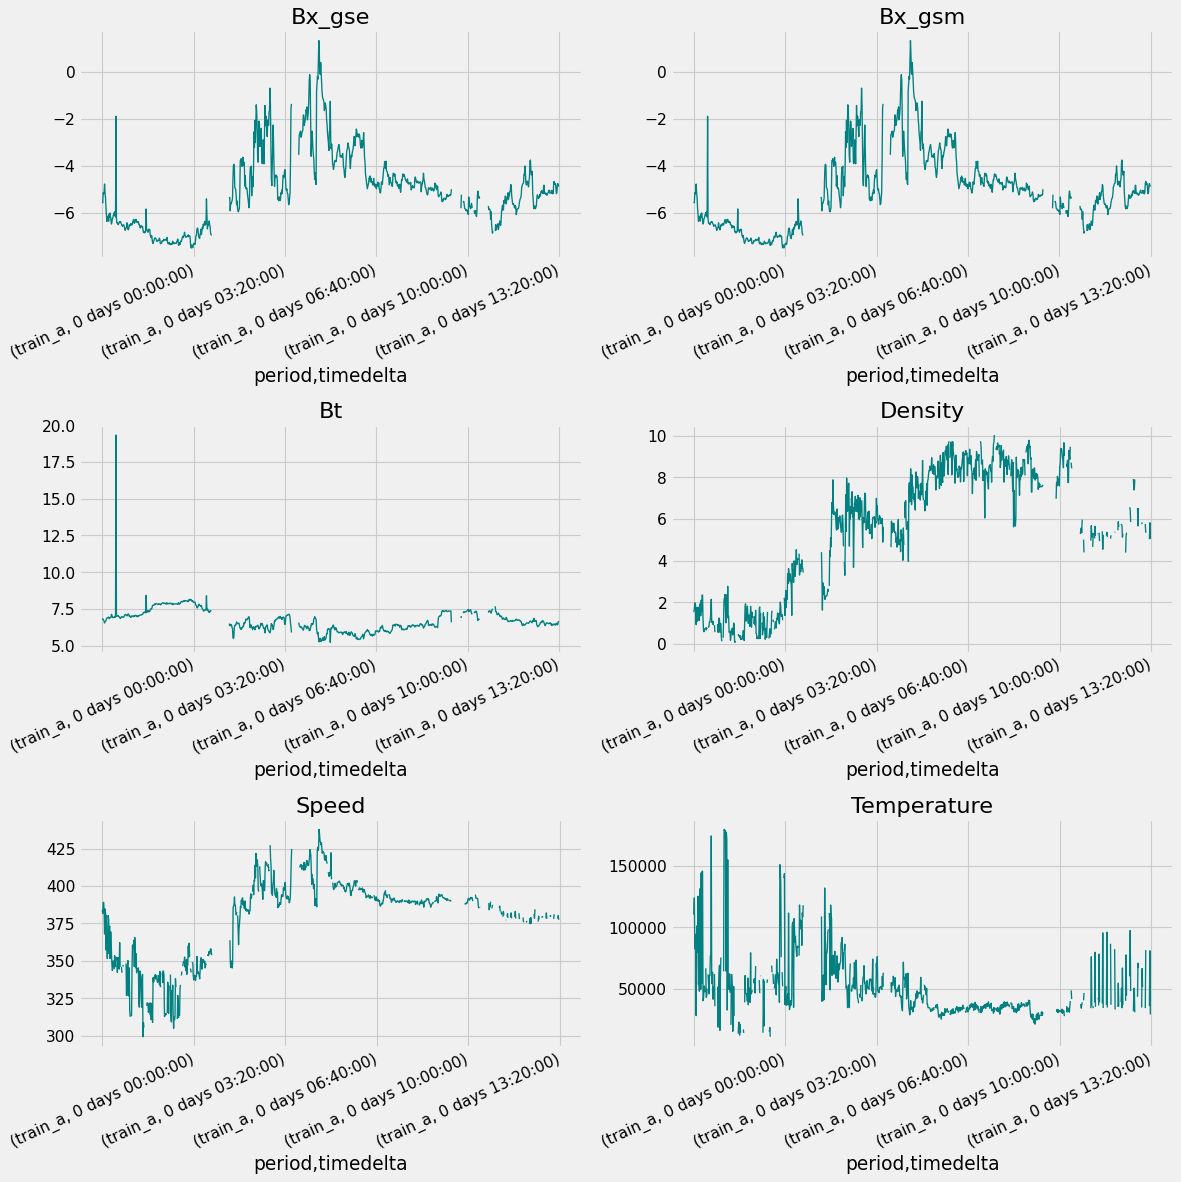

In [8]:
plt.style.use('fivethirtyeight')
def show_raw_visualization(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=80)
    for i, key in enumerate(data.columns):
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            title=f"{key.capitalize()}",
            rot=25,color='teal', lw=1.2
        )

    fig.subplots_adjust(hspace=0.8)
    plt.tight_layout()


cols_to_plot = ["bx_gse", "bx_gsm", "bt", "density", "speed", "temperature"]
show_raw_visualization(solar_wind[cols_to_plot].iloc[:1000])

In [19]:
solar_wind.isnull().sum()

bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64

<Figure size 2000x1500 with 0 Axes>

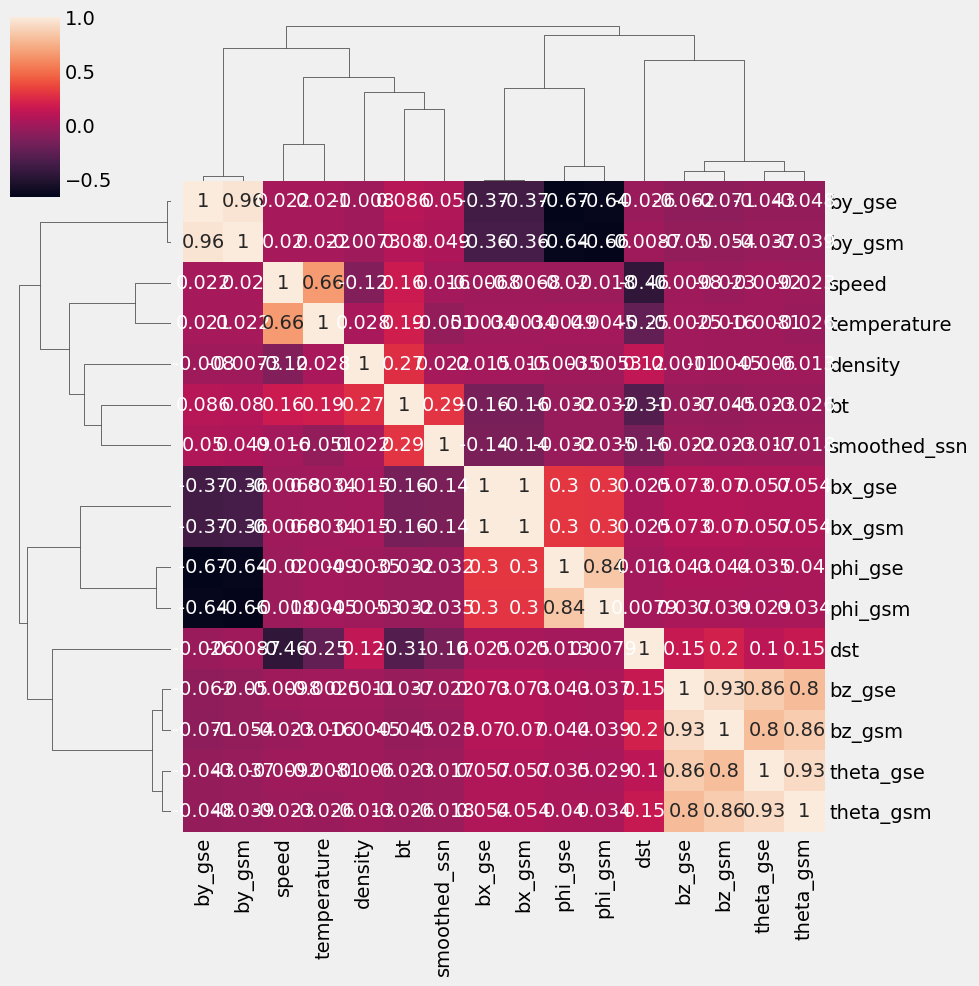

In [32]:
joined = solar_wind.join(sunspots).join(dst).fillna(method="ffill")

plt.figure(figsize=(20, 15))
sns.clustermap(joined.corr(), annot=True)

In [33]:
from numpy.random import seed
from tensorflow.random import set_seed

seed(2020)
set_seed(2021)

In [34]:
from sklearn.preprocessing import StandardScaler

# subset of solar wind features to use for modeling
SOLAR_WIND_FEATURES = [
    "bt",
    "temperature",
    "bx_gse",
    "by_gse",
    "bz_gse",
    "speed",
    "density",
]

# all of the features we'll use, including sunspot numbers
XCOLS = (
    [col + "_mean" for col in SOLAR_WIND_FEATURES]
    + [col + "_std" for col in SOLAR_WIND_FEATURES]
    + ["smoothed_ssn"]
)


def impute_features(feature_df):
    """Imputes data using the following methods:
    - `smoothed_ssn`: forward fill
    - `solar_wind`: interpolation
    """
    # forward fill sunspot data for the rest of the month
    feature_df.smoothed_ssn = feature_df.smoothed_ssn.fillna(method="ffill")
    # interpolate between missing solar wind values
    feature_df = feature_df.interpolate()
    return feature_df


def aggregate_hourly(feature_df, aggs=["mean", "std"]):
    """Aggregates features to the floor of each hour using mean and standard deviation.
    e.g. All values from "11:00:00" to "11:59:00" will be aggregated to "11:00:00".
    """
    # group by the floor of each hour use timedelta index
    agged = feature_df.groupby(
        ["period", feature_df.index.get_level_values(1).floor("H")]
    ).agg(aggs)
    # flatten hierachical column index
    agged.columns = ["_".join(x) for x in agged.columns]
    return agged


def preprocess_features(solar_wind, sunspots, scaler=None, subset=None):
    """
    Preprocessing steps:
        - Subset the data
        - Aggregate hourly
        - Join solar wind and sunspot data
        - Scale using standard scaler
        - Impute missing values
    """
    # select features we want to use
    if subset:
        solar_wind = solar_wind[subset]

    # aggregate solar wind data and join with sunspots
    hourly_features = aggregate_hourly(solar_wind).join(sunspots)

    # subtract mean and divide by standard deviation
    if scaler is None:
        scaler = StandardScaler()
        scaler.fit(hourly_features)

    normalized = pd.DataFrame(
        scaler.transform(hourly_features),
        index=hourly_features.index,
        columns=hourly_features.columns,
    )

    # impute missing values
    imputed = impute_features(normalized)

    # we want to return the scaler object as well to use later during prediction
    return imputed, scaler
    

In [35]:
features, scaler = preprocess_features(solar_wind, sunspots, subset=SOLAR_WIND_FEATURES)
print(features.shape)
features.head()

(139872, 15)


bt_mean    bt_std  temperature_mean  \
period  timedelta                                               
train_a 0 days 00:00:00  0.499705  2.443614         -0.375267   
        0 days 01:00:00  0.547177 -0.224580         -0.479430   
        0 days 02:00:00  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  0.699098 -0.278783         -0.324709   
        0 days 04:00:00  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

In [36]:
assert (features.isna().sum() == 0).all()


In [37]:
YCOLS = ["t0", "t1"]


def process_labels(dst):
    y = dst.copy()
    y["t1"] = y.groupby("period").dst.shift(-1)
    y.columns = YCOLS
    return y


labels = process_labels(dst)
labels.head()

t0    t1
period  timedelta                
train_a 0 days 00:00:00  -7 -10.0
        0 days 01:00:00 -10 -10.0
        0 days 02:00:00 -10  -6.0
        0 days 03:00:00  -6  -2.0
        0 days 04:00:00  -2   3.0

In [38]:
data = labels.join(features)
data.head()

t0    t1   bt_mean    bt_std  temperature_mean  \
period  timedelta                                                         
train_a 0 days 00:00:00  -7 -10.0  0.499705  2.443614         -0.375267   
        0 days 01:00:00 -10 -10.0  0.547177 -0.224580         -0.479430   
        0 days 02:00:00 -10  -6.0  0.739905 -0.770240         -0.574831   
        0 days 03:00:00  -6  -2.0  0.699098 -0.278783         -0.324709   
        0 days 04:00:00  -2   3.0  0.223933 -0.225168         -0.313432   

                         temperature_std  bx_gse_mean  bx_gse_std  \
period  timedelta                                                   
train_a 0 days 00:00:00         0.383941    -1.599207   -0.381502   
        0 days 01:00:00         0.953178    -1.757995   -0.867747   
        0 days 02:00:00        -0.192518    -1.912116   -1.114317   
        0 days 03:00:00         0.325491    -1.809045   -0.783042   
        0 days 04:00:00         0.201600    -1.338802   -0.484910   

                         by_gse_mean  by_gse_std  bz_gse_mean  bz_gse_std  \
period  timedelta                                                           
train_a 0 days 00:00:00     0.419516    0.031658     0.300358   -0.651645   
        0 days 01:00:00     0.179257   -0.272971     0.446103   -0.517913   
        0 days 02:00:00     0.183266   -0.822786     0.770174   -0.876490   
        0 days 03:00:00    -0.378111    0.341156     0.621194   -0.290211   
        0 days 04:00:00     0.072745    1.023019     0.467629   -0.478080   

                         speed_mean  speed_std  density_mean  density_std  \
period  timedelta                                                           
train_a 0 days 00:00:00   -0.738546   0.862524     -0.775827    -0.205724   
        0 days 01:00:00   -0.986904   0.995063     -0.861692    -0.058215   
        0 days 02:00:00   -1.013548   0.554085     -0.846222    -0.220012   
        0 days 03:00:00   -0.826469  -0.211185     -0.404306     0.218373   
        0 days 04:00:00   -0.601238   1.016033     -0.371487     0.097253   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00      0.139444  
        0 days 01:00:00      0.139444  
        0 days 02:00:00      0.139444  
        0 days 03:00:00      0.139444  
        0 days 04:00:00      0.139444

In [39]:
def get_train_test_val(data, test_per_period, val_per_period):
    """Splits data across periods into train, test, and validation"""
    # assign the last `test_per_period` rows from each period to test
    test = data.groupby("period").tail(test_per_period)
    interim = data[~data.index.isin(test.index)]
    # assign the last `val_per_period` from the remaining rows to validation
    val = data.groupby("period").tail(val_per_period)
    # the remaining rows are assigned to train
    train = interim[~interim.index.isin(val.index)]
    return train, test, val


train, test, val = get_train_test_val(data, test_per_period=6_000, val_per_period=3_000)

In [40]:
import tensorflow as tf
from keras import preprocessing


data_config = {
    "timesteps": 32,
    "batch_size": 32,
}


def timeseries_dataset_from_df(df, batch_size):
    dataset = None
    timesteps = data_config["timesteps"]

    # iterate through periods
    for _, period_df in df.groupby("period"):
        # realign features and labels so that first sequence of 32 is aligned with the 33rd target
        inputs = period_df[XCOLS][:-timesteps]
        outputs = period_df[YCOLS][timesteps:]

        period_ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            inputs,
            outputs,
            timesteps,
            batch_size=batch_size,
        )

        if dataset is None:
            dataset = period_ds
        else:
            dataset = dataset.concatenate(period_ds)

    return dataset


train_ds = timeseries_dataset_from_df(train, data_config["batch_size"])
val_ds = timeseries_dataset_from_df(val, data_config["batch_size"])

print(f"Number of train batches: {len(train_ds)}")
print(f"Number of val batches: {len(val_ds)}")

Number of train batches: 3804
Number of val batches: 276


In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,LSTM

# define our model
model_config = {"n_epochs": 20, "n_neurons": 512, "dropout": 0.4, "stateful": False}

model = Sequential()
model.add(
    LSTM(
        model_config["n_neurons"],
        # usually set to (`batch_size`, `sequence_length`, `n_features`)
        # setting the batch size to None allows for variable length batches
        batch_input_shape=(None, data_config["timesteps"], len(XCOLS)),
        stateful=model_config["stateful"],
        dropout=model_config["dropout"],
    )
)
model.add(Dense(len(YCOLS)))
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 512)               1081344   
                                                                 
 dense (Dense)               (None, 2)                 1026      
                                                                 
Total params: 1,082,370
Trainable params: 1,082,370
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(
    train_ds,
    batch_size=data_config["batch_size"],
    verbose=1,
    epochs=20,
    steps_per_epoch=200,
    shuffle=False,
    validation_data=val_ds,
)

Epoch 1/20
200/200 [==============================] - 138s 690ms/step - loss: 212.6825 - val_loss: 289.7638
Epoch 2/20
200/200 [==============================] - 120s 598ms/step - loss: 209.9999 - val_loss: 338.9066
Epoch 3/20
200/200 [==============================] - 113s 565ms/step - loss: 300.3251 - val_loss: 213.8081
Epoch 4/20
200/200 [==============================] - 112s 561ms/step - loss: 212.0067 - val_loss: 223.5724
Epoch 5/20
200/200 [==============================] - 118s 591ms/step - loss: 104.8579 - val_loss: 243.9589
Epoch 6/20
200/200 [==============================] - 121s 602ms/step - loss: 125.5294 - val_loss: 279.4477
Epoch 7/20
200/200 [==============================] - 116s 578ms/step - loss: 204.6445 - val_loss: 263.5020
Epoch 8/20
200/200 [==============================] - 124s 618ms/step - loss: 115.5401 - val_loss: 325.3006
Epoch 9/20
200/200 [==============================] - 128s 640ms/step - loss: 87.3457 - val_loss: 306.9865
Epoch 10/20
200/200 [========

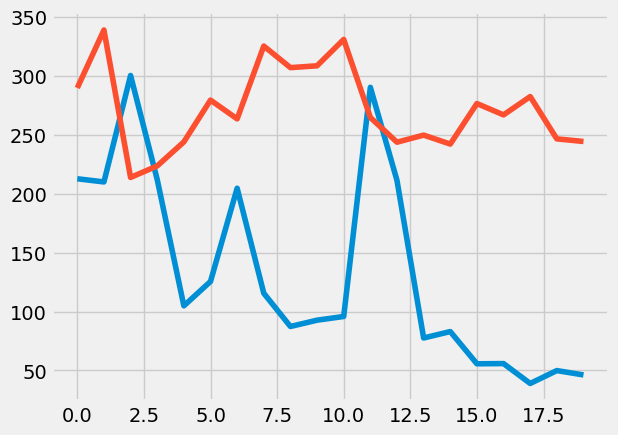

In [60]:
for name, values in history.history.items():
    plt.plot(values)

In [61]:
test_ds = timeseries_dataset_from_df(test, data_config["batch_size"])
mse = model.evaluate(test_ds)
print(f"Test RMSE: {mse**.5:.2f}")

558/558 [==============================] - 20s 36ms/step - loss: 197.2098
Test RMSE: 14.04


AttributeError: 'Sequential' object has no attribute 'score'

In [62]:
import json
import pickle

model.save("model")

with open("scaler.pck", "wb") as f:
    pickle.dump(scaler, f)

data_config["solar_wind_subset"] = SOLAR_WIND_FEATURES
print(data_config)
with open("config.json", "w") as f:
    json.dump(data_config, f)

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


{'timesteps': 32, 'batch_size': 32, 'solar_wind_subset': ['bt', 'temperature', 'bx_gse', 'by_gse', 'bz_gse', 'speed', 'density']}


In [63]:
import pickle

# Assuming you have a trained model object named 'model'

# Open a file for writing in binary mode
with open('model.pkl', 'wb') as file:
    # Serialize the model object using pickle
    pickle.dump(model, file)

INFO:tensorflow:Assets written to: ram://56b0d0ce-197d-41d6-a47e-8127083f3743/assets


INFO:tensorflow:Assets written to: ram://56b0d0ce-197d-41d6-a47e-8127083f3743/assets


In [66]:
import taipy as tp
import joblib